In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset

In [62]:
resume_data = pd.read_csv('../data/resume-mining.csv')

In [63]:
resume_data

job_ad_id job_city                   job_industry    job_type  \
0           384  Chicago                  manufacturing  supervisor   
1           384  Chicago                  manufacturing  supervisor   
2           384  Chicago                  manufacturing  supervisor   
3           384  Chicago                  manufacturing  supervisor   
4           385  Chicago                  other_service   secretary   
...         ...      ...                            ...         ...   
4865       1344   Boston  finance_insurance_real_estate   secretary   
4866        382   Boston                  other_service     manager   
4867        382   Boston                  other_service     manager   
4868        382   Boston                  other_service     manager   
4869        382   Boston                  other_service     manager   

      job_fed_contractor  job_equal_opp_employer job_ownership  job_req_any  \
0                    NaN                       1       unknown            1   
1                    NaN                       1       unknown            1   
2                    NaN                       1       unknown            1   
3                    NaN                       1       unknown            1   
4                    0.0                       1     nonprofit            1   
...                  ...                     ...           ...          ...   
4865                 0.0                       0       private            1   
4866                 NaN                       0       unknown            0   
4867                 NaN                       0       unknown            0   
4868                 NaN                       0       unknown            0   
4869                 NaN                       0       unknown            0   

      job_req_communication  job_req_education  ... honors  \
0                         0                  0  ...      0   
1                         0                  0  ...      0   
2                         0                  0  ...      0   
3                         0                  0  ...      0   
4                         0                  0  ...      0   
...                     ...                ...  ...    ...   
4865                      0                  0  ...      0   
4866                      0                  0  ...      0   
4867                      0                  0  ...      0   
4868                      0                  0  ...      0   
4869                      0                  0  ...      0   

      worked_during_school  years_experience computer_skills  special_skills  \
0                        0                 6               1               0   
1                        1                 6               1               0   
2                        1                 6               1               0   
3                        0                 6               1               1   
4                        1                22               1               0   
...                    ...               ...             ...             ...   
4865                     0                 1               1               1   
4866                     1                 6               1               0   
4867                     1                 8               1               0   
4868                     1                 2               1               0   
4869                     0                 7               0               0   

     volunteer military employment_holes  has_email_address  resume_quality  
0            0        0                1                  0             low  
1            1        1                0                  1            high  
2            0        0                0                  0             low  
3            1        0                1                  1            high  
4            0        0                0                  1            high  
...        ...      ...       

In [64]:
# drop null
resume_data.isnull().sum()
resume_data_drop_null = resume_data.drop(['job_ad_id',
                                          'job_fed_contractor',
                                          'job_req_min_experience'],
                                         axis=1)

In [65]:
# check data one more time
resume_data_drop_null.isnull().sum()

job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [66]:
# dividing columns into categorical and numerical list
categorical = []
numerical = []

In [67]:
for column in resume_data_drop_null.columns:
    if resume_data_drop_null[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

In [68]:
categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_school',
 'firstname',
 'race',
 'gender',
 'resume_quality']

In [69]:
numerical

['job_equal_opp_employer',
 'job_req_any',
 'job_req_communication',
 'job_req_education',
 'job_req_computer',
 'job_req_organization',
 'received_callback',
 'years_college',
 'college_degree',
 'honors',
 'worked_during_school',
 'years_experience',
 'computer_skills',
 'special_skills',
 'volunteer',
 'military',
 'employment_holes',
 'has_email_address']

## Encoding data for training

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
# initialize label encoder
LabelEncoder = LabelEncoder()

In [72]:
# if columns has less than 3 unique categorical values
# then label encoding, else frequency encoding will be performed
for column in categorical:
    if len(resume_data_drop_null[column].unique()) <= 3:
        resume_data_drop_null[column] = LabelEncoder.fit_transform(resume_data_drop_null[column])
    else:
        freq_encoding = resume_data_drop_null[column].value_counts(normalize=True).to_dict()
        resume_data_drop_null[column] = resume_data_drop_null[column].map(freq_encoding)

In [73]:
resume_data_drop_null.head()

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
0         1      0.082957  0.077207                       1       0.409035   
1         1      0.082957  0.077207                       1       0.409035   
2         1      0.082957  0.077207                       1       0.409035   
3         1      0.082957  0.077207                       1       0.409035   
4         1      0.319918  0.332854                       1       0.065298   

   job_req_any  job_req_communication  job_req_education  job_req_computer  \
0            1                      0                  0                 1   
1            1                      0                  0                 1   
2            1                      0                  0                 1   
3            1                      0                  0                 1   
4            1                      0                  0                 1   

   job_req_organization  ...  honors  worked_during_school  years_experience  \
0                     0  ...       0                     0                 6   
1                     0  ...       0                     1                 6   
2                     0  ...       0                     1                 6   
3                     0  ...       0                     0                 6   
4                     1  ...       0                     1                22   

   computer_skills  special_skills  volunteer  military  employment_holes  \
0                1               0          0         0                 1   
1                1               0          1         1                 0   
2                1               0          0         0                 0   
3                1               1          1         0                 1   
4                1               0          0         0                 0   

   has_email_address  resume_quality  
0                  0               1  
1                  1               0  
2                  0               1  
3                  1               0  
4                  1               0  

[5 rows x 27 columns]

## Visualize data

In [14]:
# Pair plot
sns.pairplot(resume_data_drop_null, hue='resume_quality')
plt.show()

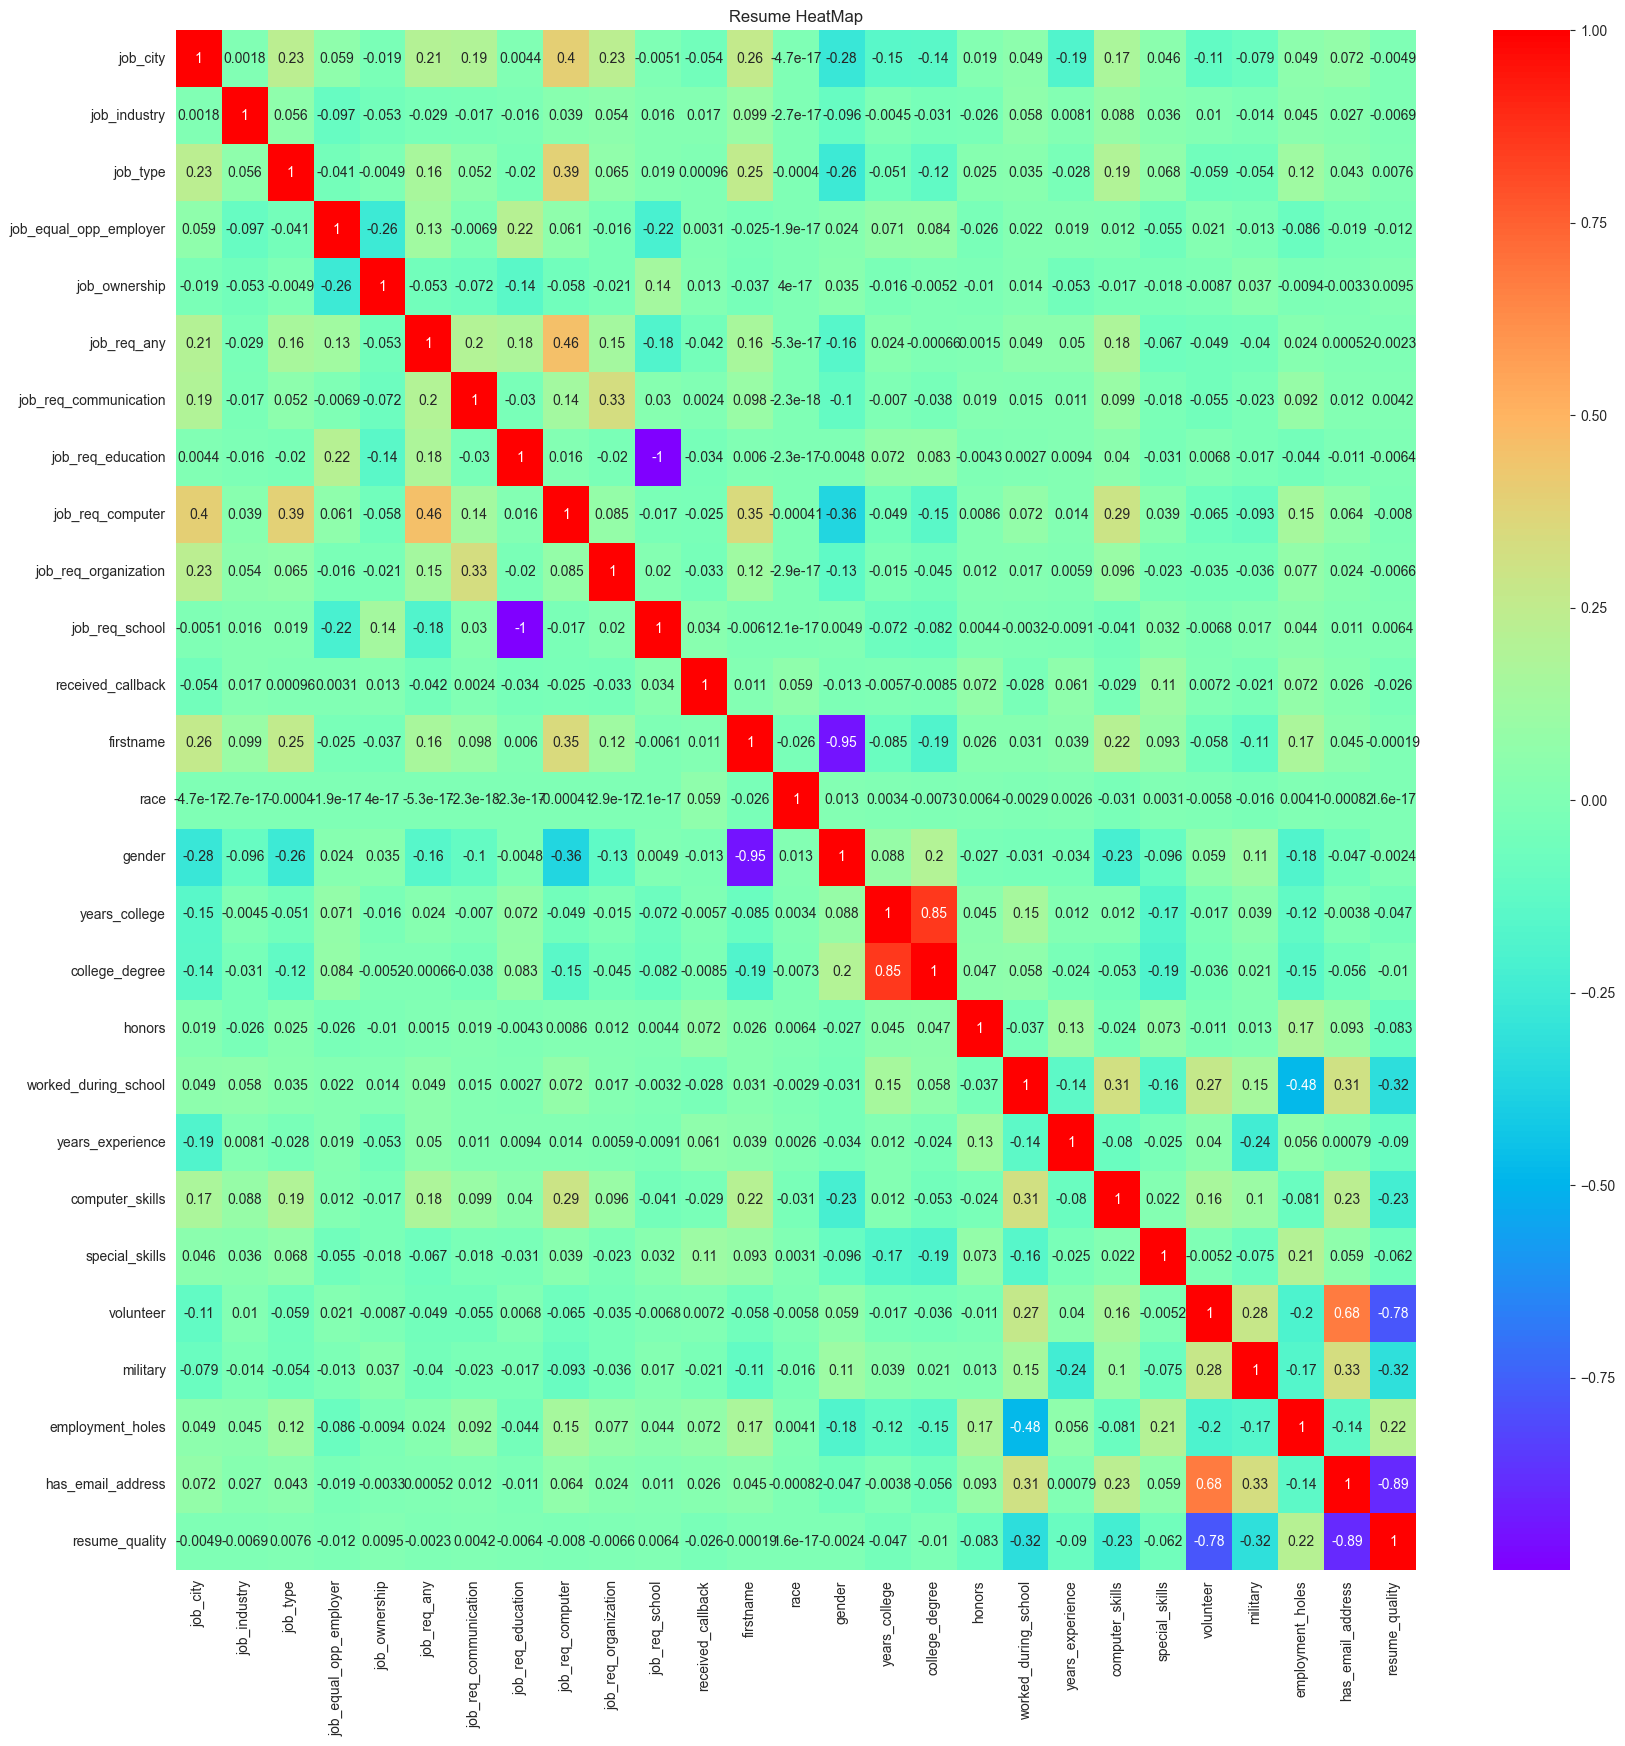

In [74]:
# Heat map
corr = resume_data_drop_null.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.title('Resume HeatMap')
plt.show()

## Split data into train and test sets

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
resume_data_drop_null

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
0            1      0.082957  0.077207                       1       0.409035   
1            1      0.082957  0.077207                       1       0.409035   
2            1      0.082957  0.077207                       1       0.409035   
3            1      0.082957  0.077207                       1       0.409035   
4            1      0.319918  0.332854                       1       0.065298   
...        ...           ...       ...                     ...            ...   
4865         0      0.085010  0.332854                       0       0.438193   
4866         0      0.319918  0.152156                       0       0.409035   
4867         0      0.319918  0.152156                       0       0.409035   
4868         0      0.319918  0.152156                       0       0.409035   
4869         0      0.319918  0.152156                       0       0.409035   

      job_req_any  job_req_communication  job_req_education  job_req_computer  \
0               1                      0                  0                 1   
1               1                      0                  0                 1   
2               1                      0                  0                 1   
3               1                      0                  0                 1   
4               1                      0                  0                 1   
...           ...                    ...                ...               ...   
4865            1                      0                  0                 1   
4866            0                      0                  0                 0   
4867            0                      0                  0                 0   
4868            0                      0                  0                 0   
4869            0                      0                  0                 0   

      job_req_organization  ...  honors  worked_during_school  \
0                        0  ...       0                     0   
1                        0  ...       0                     1   
2                        0  ...       0                     1   
3                        0  ...       0                     0   
4                        1  ...       0                     1   
...                    ...  ...     ...                   ...   
4865                     0  ...       0                     0   
4866                     0  ...       0                     1   
4867                     0  ...       0                     1   
4868                     0  ...       0                     1   
4869                     0  ...       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
0                    6                1               0          0         0   
1                    6                1               0          1         1   
2                    6                1               0          0         0   
3                    6                1               1          1         0   
4                   22                1               0          0         0   
...                ...              ...             ...        ...       ...   
4865                 1                1               1          0         0   
4866                 6                1               0          0         0   
4867                 8                1               0          1         0   
4868                 2                1               0          1         1   
4869                 7                0               0          0         0   

      employment_holes  has_email_address  resume_quality  
0                    1                  0               1  
1                    0                  1               0  
2                    0                  0               1  
3                    1                  1               0  
4                 

In [77]:
X = resume_data_drop_null.iloc[:, :-1]

In [78]:
X

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
0            1      0.082957  0.077207                       1       0.409035   
1            1      0.082957  0.077207                       1       0.409035   
2            1      0.082957  0.077207                       1       0.409035   
3            1      0.082957  0.077207                       1       0.409035   
4            1      0.319918  0.332854                       1       0.065298   
...        ...           ...       ...                     ...            ...   
4865         0      0.085010  0.332854                       0       0.438193   
4866         0      0.319918  0.152156                       0       0.409035   
4867         0      0.319918  0.152156                       0       0.409035   
4868         0      0.319918  0.152156                       0       0.409035   
4869         0      0.319918  0.152156                       0       0.409035   

      job_req_any  job_req_communication  job_req_education  job_req_computer  \
0               1                      0                  0                 1   
1               1                      0                  0                 1   
2               1                      0                  0                 1   
3               1                      0                  0                 1   
4               1                      0                  0                 1   
...           ...                    ...                ...               ...   
4865            1                      0                  0                 1   
4866            0                      0                  0                 0   
4867            0                      0                  0                 0   
4868            0                      0                  0                 0   
4869            0                      0                  0                 0   

      job_req_organization  ...  college_degree  honors  worked_during_school  \
0                        0  ...               1       0                     0   
1                        0  ...               0       0                     1   
2                        0  ...               1       0                     1   
3                        0  ...               0       0                     0   
4                        1  ...               0       0                     1   
...                    ...  ...             ...     ...                   ...   
4865                     0  ...               0       0                     0   
4866                     0  ...               1       0                     1   
4867                     0  ...               1       0                     1   
4868                     0  ...               1       0                     1   
4869                     0  ...               1       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
0                    6                1               0          0         0   
1                    6                1               0          1         1   
2                    6                1               0          0         0   
3                    6                1               1          1         0   
4                   22                1               0          0         0   
...                ...              ...             ...        ...       ...   
4865                 1                1               1          0         0   
4866                 6                1               0          0         0   
4867                 8                1               0          1         0   
4868                 2                1               0          1         1   
4869                 7                0               0          0         0   

      employment_holes  has_email_address  
0                    1                  0  
1                    0                

In [79]:
y = resume_data_drop_null.iloc[:, -1:]

In [80]:
y

resume_quality
0                  1
1                  0
2                  1
3                  0
4                  0
...              ...
4865               1
4866               1
4867               0
4868               0
4869               1

[4870 rows x 1 columns]

In [81]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
1187         0      0.213963  0.151129                       0       0.438193   
2540         0      0.267762  0.332854                       0       0.409035   
1117         1      0.267762  0.332854                       1       0.438193   
2934         1      0.267762  0.077207                       0       0.409035   
4165         0      0.319918  0.167967                       0       0.409035   
...        ...           ...       ...                     ...            ...   
4426         1      0.030390  0.151129                       0       0.409035   
466          1      0.319918  0.332854                       0       0.409035   
3092         0      0.267762  0.332854                       0       0.438193   
3772         1      0.213963  0.167967                       0       0.438193   
860          0      0.085010  0.118686                       0       0.409035   

      job_req_any  job_req_communication  job_req_education  job_req_computer  \
1187            1                      0                  1                 0   
2540            1                      0                  0                 1   
1117            1                      0                  0                 1   
2934            1                      1                  0                 1   
4165            1                      0                  0                 0   
...           ...                    ...                ...               ...   
4426            0                      0                  0                 0   
466             1                      0                  0                 1   
3092            1                      0                  0                 1   
3772            0                      0                  0                 0   
860             1                      0                  0                 1   

      job_req_organization  ...  college_degree  honors  worked_during_school  \
1187                     0  ...               1       0                     1   
2540                     0  ...               0       0                     1   
1117                     0  ...               1       0                     1   
2934                     0  ...               1       0                     1   
4165                     0  ...               1       0                     1   
...                    ...  ...             ...     ...                   ...   
4426                     0  ...               0       0                     0   
466                      0  ...               1       0                     1   
3092                     0  ...               0       0                     0   
3772                     0  ...               1       1                     0   
860                      0  ...               0       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
1187                 6                1               0          0         0   
2540                16                1               1          1         0   
1117                14                1               0          0         0   
2934                12                1               1          0         0   
4165                 2                1               0          1         1   
...                ...              ...             ...        ...       ...   
4426                 6                0               0          0         0   
466                  7                1               1          0         0   
3092                13                1               1          0         0   
3772                 6                0               1          0         0   
860                 19                0               0          1         0   

      employment_holes  has_email_address  
1187                 0                  0  
2540                 0                

## Predict resume quality using decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [84]:
DecisionTree = DecisionTreeClassifier()

In [85]:
# train decision tree
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
# visualize decision tree as text
decision_tree_text_representation = tree.export_text(DecisionTree)
print(decision_tree_text_representation)

|--- feature_25 <= 0.50
|   |--- feature_22 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_24 <= 0.50
|   |   |   |   |--- feature_19 <= 6.50
|   |   |   |   |   |--- feature_15 <= 2.50
|   |   |   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.25
|   |   |   |   |   |   |   |--- feature_19 <= 4.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.24
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  0.24
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.42
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.42
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_19 >  4.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_15 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_19 >  6.50
| 

## Prediction

In [87]:
y_pred = DecisionTree.predict(X_test)

In [88]:
X_test

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
1654         0      0.319918  0.167967                       0       0.409035   
1101         1      0.319918  0.332854                       0       0.409035   
1149         0      0.267762  0.151129                       1       0.438193   
2763         1      0.085010  0.332854                       0       0.438193   
3145         0      0.213963  0.152156                       0       0.438193   
...        ...           ...       ...                     ...            ...   
2231         0      0.319918  0.077207                       0       0.409035   
1510         1      0.319918  0.332854                       0       0.409035   
3418         1      0.082957  0.332854                       0       0.409035   
680          1      0.213963  0.077207                       1       0.438193   
829          0      0.213963  0.167967                       0       0.438193   

      job_req_any  job_req_communication  job_req_education  job_req_computer  \
1654            1                      1                  0                 1   
1101            1                      0                  0                 1   
1149            1                      0                  0                 0   
2763            1                      0                  0                 1   
3145            1                      0                  0                 0   
...           ...                    ...                ...               ...   
2231            1                      0                  0                 0   
1510            1                      0                  0                 1   
3418            1                      0                  1                 1   
680             1                      0                  0                 0   
829             1                      0                  0                 0   

      job_req_organization  ...  college_degree  honors  worked_during_school  \
1654                     0  ...               1       0                     1   
1101                     0  ...               1       0                     1   
1149                     0  ...               0       1                     0   
2763                     0  ...               0       0                     0   
3145                     0  ...               1       0                     1   
...                    ...  ...             ...     ...                   ...   
2231                     0  ...               0       0                     1   
1510                     0  ...               1       0                     1   
3418                     0  ...               0       0                     0   
680                      0  ...               0       0                     0   
829                      0  ...               1       0                     1   

      years_experience  computer_skills  special_skills  volunteer  military  \
1654                 2                1               0          1         1   
1101                 6                1               1          1         0   
1149                 8                0               0          0         0   
2763                 6                1               0          0         0   
3145                14                1               1          1         0   
...                ...              ...             ...        ...       ...   
2231                 7                1               1          0         0   
1510                 6                1               0          0         0   
3418                 6                1               0          0         0   
680                 21                1               1          1         0   
829                  2                1               0          1         1   

      employment_holes  has_email_address  
1654                 0                  1  
1101                 1                

In [89]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [90]:
y_test

resume_quality
1654               0
1101               0
1149               1
2763               1
3145               0
...              ...
2231               1
1510               1
3418               1
680                0
829                0

[974 rows x 1 columns]

## Evaluate Model

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
print(accuracy_score(y_test, y_pred))

0.9845995893223819


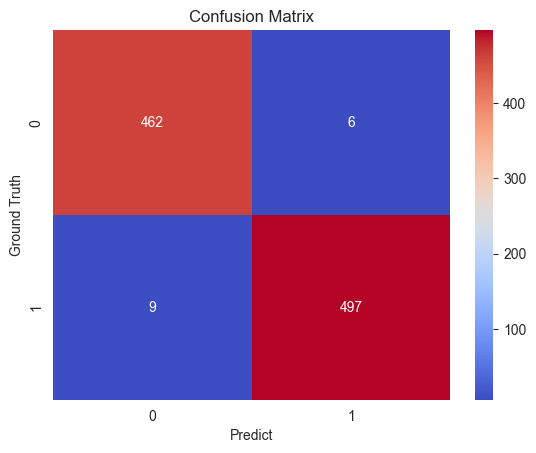

In [93]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Ground Truth')
plt.show()